In [1]:
import pandas as pd

In [608]:
data = pd.read_csv('data/scores.csv')
data

,Method,threshold,params,ROC AUC,F1 score,Accuracy,Precision,Recall,TP,TN,FP,FN,Training time,Inference time
0,DummyClassifier,0.500,"{'random_state': [0], 'strategy': ['stratified']}",0.498732,0.084291,0.840667,0.078014,0.091667,22,2500,260,218,1.213294,0.001280
1,Basic LogisticRegression,0.500,"{'random_state': [0], 'max_iter': [3000]}",0.726893,0.008065,0.918000,0.125000,0.004167,1,2753,7,239,35.735701,0.025318
2,Basic LogisticRegression [w/thresholding],0.220,"{'random_state': [0], 'max_iter': [3000]}",0.726893,0.218978,0.893000,0.263158,0.187500,45,2634,126,195,35.735701,0.010839
3,Basic DecisionTreeClassifier,0.500,{'random_state': [0]},0.523279,0.124248,0.854333,0.119691,0.129167,31,2532,228,209,2.119543,0.011485
4,Basic DecisionTreeClassifier [w/thresholding],0.125,{'random_state': [0]},0.523279,0.124248,0.854333,0.119691,0.129167,31,2532,228,209,2.119543,0.005133
5,Basic RandomForestClassifier,0.500,{'random_state': [0]},0.690861,0.000000,0.920000,0.000000,0.000000,0,2760,0,240,2.552000,0.097967
6,Basic RandomForestClassifier [w/thresholding],0.200,{'random_state': [0]},0.690861,0.216590,0.886667,0.242268,0.195833,47,2613,147,193,2.552000,0.051578
7,Basic XGBClassifier,0.500,"{'seed': [0], 'objective': ['binary:logistic']...",0.717571,0.068441,0.918333,0.391304,0.037500,9,2746,14,231,9.429600,0.031730
8,Basic XGBClassifier [w/thresholding],0.221,"{'seed': [0], 'objective': ['binary:logistic']...",0.717571,0.215962,0.888667,0.247312,0.191667,46,2620,140,194,9.429600,0.017824
9,Grid LogisticRegression [w/thresholding],0.207,"[{'random_state': [0], 'max_iter': [3000], 'so...",0.727111,0.206897,0.892667,0.253012,0.175000,42,2636,124,198,29.775704,0.005946


## Les modèles sans aucun ajustement

In [609]:
base = data[ ~(data.Method.str.contains('threshold')) & (data.Method.str.contains('Basic')) ][['Method','ROC AUC', 'F1 score','Recall']]
base

,Method,ROC AUC,F1 score,Recall
1,Basic LogisticRegression,0.726893,0.008065,0.004167
3,Basic DecisionTreeClassifier,0.523279,0.124248,0.129167
5,Basic RandomForestClassifier,0.690861,0.000000,0.000000
7,Basic XGBClassifier,0.717571,0.068441,0.037500


## Les modèles avec un `seuillage`

In [610]:
threshold = data[ (data.Method.str.contains('threshold')) & (data.Method.str.contains('Basic')) ][['Method', 'ROC AUC', 'F1 score', 'Recall']]
threshold

,Method,ROC AUC,F1 score,Recall
2,Basic LogisticRegression [w/thresholding],0.726893,0.218978,0.187500
4,Basic DecisionTreeClassifier [w/thresholding],0.523279,0.124248,0.129167
6,Basic RandomForestClassifier [w/thresholding],0.690861,0.216590,0.195833
8,Basic XGBClassifier [w/thresholding],0.717571,0.215962,0.191667


## Les modèles avec une recherche des meilleurs paramètres via `gridsearchcv` + `seuillage`

In [644]:
grid = data[ (data.Method.str.contains('threshold')) & (data.Method.str.contains('Grid')) ][['Method', 'ROC AUC', 'F1 score', 'Recall']]
grid

,Method,ROC AUC,F1 score,Recall
9,Grid LogisticRegression [w/thresholding],0.727111,0.206897,0.175000
10,Grid DecisionTreeClassifier [w/thresholding],0.680728,0.204633,0.220833
11,Grid RandomForestClassifier [w/thresholding],0.709695,0.191176,0.162500
12,Grid XGBClassifier [w/thresholding],0.727433,0.204724,0.162500


## Les modèles avec une recherche des meilleurs paramètres via `gridsearchcv` + `seuillage` + `class_weight='balanced'` 

In [645]:
balanced = data[ (data.Method.str.contains('threshold')) & (data.Method.str.contains('Balanced')) ][['Method', 'ROC AUC', 'F1 score', 'Recall']]
balanced

,Method,ROC AUC,F1 score,Recall
13,Balanced LogisticRegression [w/thresholding],0.727319,0.193177,0.908333
14,Balanced DecisionTreeClassifier [w/thresholding],0.657943,0.184245,0.891667
15,Balanced RandomForestClassifier [w/thresholding],0.693426,0.199043,0.866667
16,Balanced XGBClassifier [w/thresholding],0.725623,0.243792,0.675000


## Comparaison graphique des même modèles

In [646]:
import seaborn as sns
import matplotlib.pyplot as plt

In [647]:
def plot_scores( data_tmp ):

    fig = plt.figure(figsize=(20,5))
    data_tmp = data_tmp.copy()
    
    #data_tmp['Method'] = data_tmp['Method'].apply(lambda x: str(x).rjust(100,'-').upper())
    labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

    ax1 = plt.subplot(1,3,1)
    sns.barplot(data=data_tmp, y='Method', x='ROC AUC')
    plt.xlim([0, 1])
    plt.title("ROC AUC")
    ax1.bar_label(ax1.containers[0])
    ax1.set_yticklabels(labels)

    ax2 = plt.subplot(1,3,2)
    sns.barplot(data=data_tmp, y='Method', x='F1 score')
    plt.xticks(rotation=90)
    plt.xlim([0, 1])
    plt.title("F1 score")
    ax2.axes.yaxis.set_visible(False)
    ax2.bar_label(ax2.containers[0])

    ax3 = plt.subplot(1,3,3)
    sns.barplot(data=data_tmp, y='Method', x='Recall')
    plt.xticks(rotation=90)
    plt.xlim([0, 1])
    plt.title("Recall")
    ax3.axes.yaxis.set_visible(False)
    ax3.bar_label(ax3.containers[0])

    fig.tight_layout()

    plt.show()

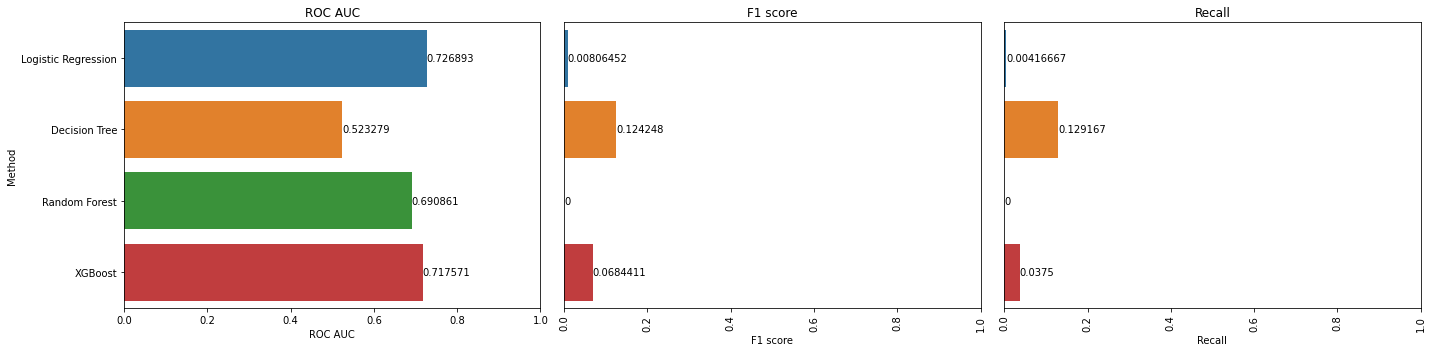

In [648]:
plot_scores( base )

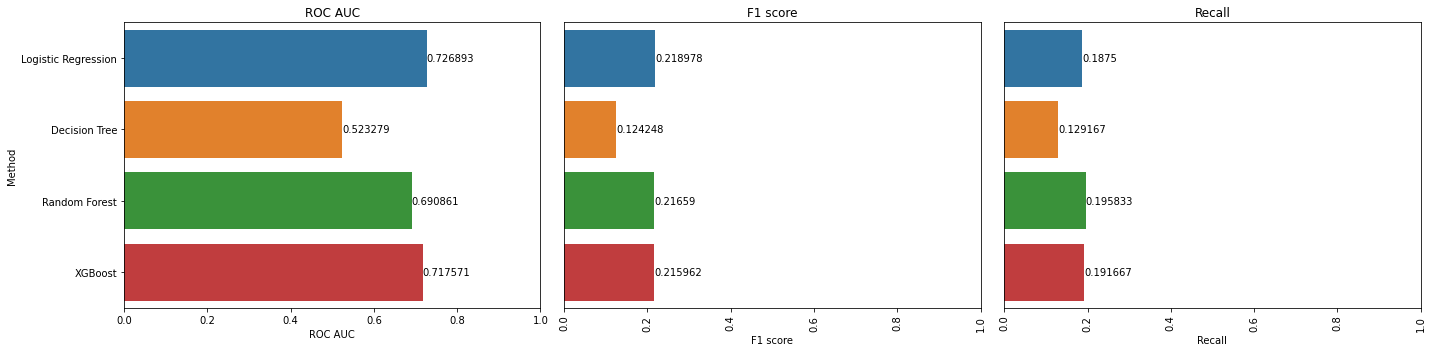

In [649]:
plot_scores( threshold )

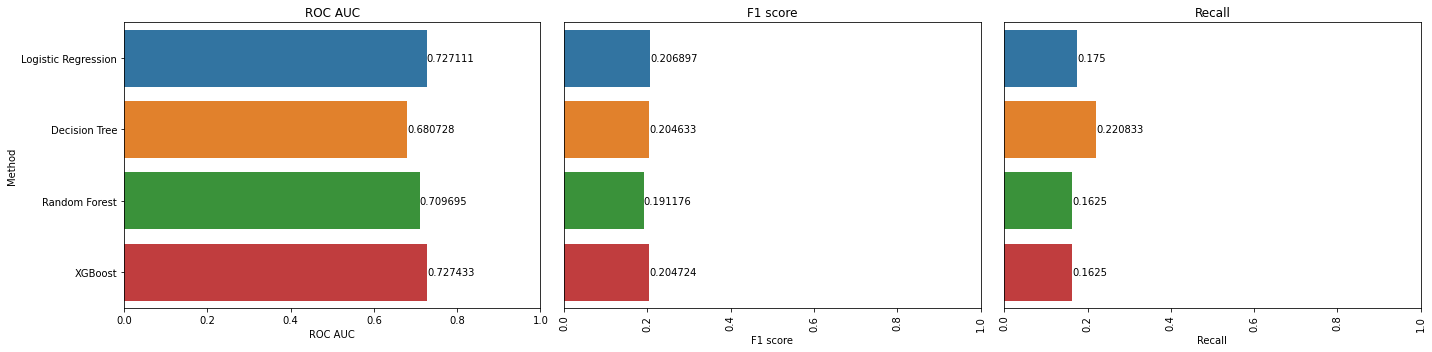

In [650]:
plot_scores( grid )

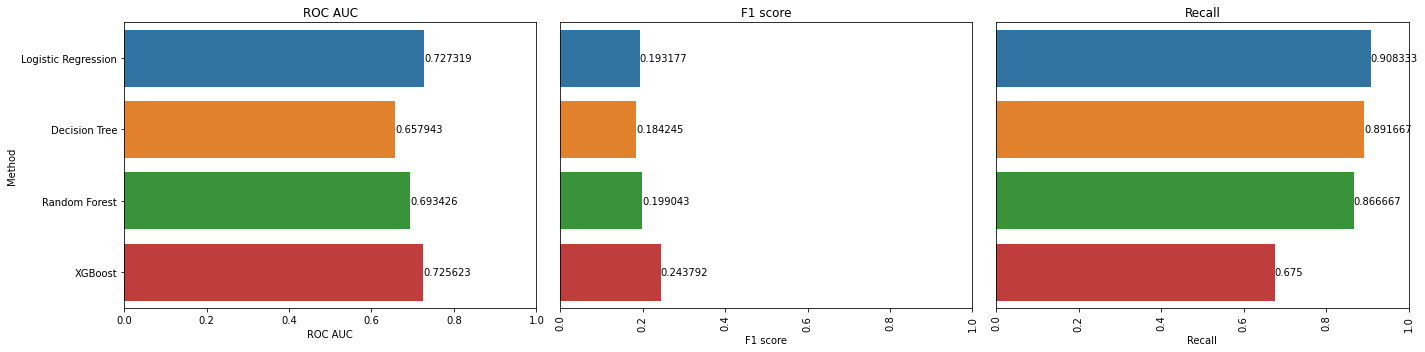

In [651]:
plot_scores( balanced )